In [2]:
## import tensorflow 
import tensorflow as tf
import numpy as np

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
### https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
#matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

w = 10
h = 10
fig = plt.figure(figsize=(9, 13))
columns = 4
rows = 5
ax = []

for i in range( columns*rows ):
    #img = np.random.randint(10, size=(h,w))  
    index = random.randint(0, len(X_train))
    img = X_train[index].squeeze()
    
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("ax:"+str(i))  # set title
    plt.imshow(img, alpha=0.25)

plt.show()  # finally, render the plot

In [5]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

In [6]:
def whiten(X):
    #newX = center(X)
    cov = X.T.dot(X)/float(X.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5)
    return whitened

In [7]:
def normCNN(X):
    X_norm = X/255.
    # centeralization
#    X_norm = X_norm - X_norm.mean(axis=0)
    # standardization
 #   X_norm = X_norm/np.std(X_norm, axis = 0)
    # rescaling to set between 0 and 1    
    return X_norm

In [8]:
def standardizedCNN(X):
    X_standardized = X/np.std(X, axis = 0)
    
    return X_standardized

In [9]:
# to mitigate value goes below zero 
def RescaleCNN(X):
    X_rescaled = (X - X.min()) / (X.max() - X.min())
    
    return X_rescaled

In [10]:
def reshapeback(X):
    X_reshapeback = X.reshape(-1,32,32,3)
    return X_reshapeback    

In [12]:
# image reshape
def img_reshape(X):
    X_img_reshape = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
    return X_img_reshape

In [14]:
# pre-processing sequence
# 1. centralization
# 2. standardization
# 3. 

#X_train = normCNN(X_train)
#X_valid = normCNN(X_valid)
#X_test = normCNN(X_test)

X_train = img_reshape(X_train)
X_valid = img_reshape(X_valid)
X_test = img_reshape(X_test)


In [15]:
X_train = center(X_train)
X_valid = center(X_valid)
X_test = center(X_test)

In [16]:
X_train = standardizedCNN(X_train)
X_valid = standardizedCNN(X_valid)
X_test = standardizedCNN(X_test)

In [17]:
X_train = whiten(X_train)
X_valid = whiten(X_valid)
X_test = whiten(X_test)

In [18]:
X_train = RescaleCNN(X_train)
X_valid = RescaleCNN(X_valid)
X_test = RescaleCNN(X_test)

In [19]:
X_train = reshapeback(X_train)
X_valid = reshapeback(X_valid)
X_test = reshapeback(X_test)

In [20]:
X_train.shape

(34799, 32, 32, 3)

In [21]:
# graying out
X_train = X_train.mean(axis=-1,keepdims=1) 
X_valid = X_valid.mean(axis=-1,keepdims=1)
X_test = X_test.mean(axis=-1,keepdims=1)

In [22]:
X_train.shape

(34799, 32, 32, 1)

In [23]:
def plotImage(X):
    plt.figure(figsize = (1.5,1.5))
    plt.imshow(X.reshape(32,32))
    plt.show()
    plt.close()

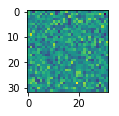

In [24]:
plotImage(X_train[12,:])

In [17]:
#cov = np.cov(X_norm,rowvar = True)

In [20]:
#U,S,V = np.linalg.svd(cov)

In [21]:
#print(U.shape,S.shape)

In [22]:
#print (np.diag(S))

In [23]:
#print ('\nshape:',np.diag(S).shape)

In [24]:
#epsilon = 0.1
#X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm)



In [18]:
import pandas as pd
my_csv = pd.read_csv('signnames.csv')
ClassId_Name = my_csv.ClassId
Sign_Name = my_csv.SignName

print(len(ClassId_Name))

43


In [19]:
### 34,799 of the dataset images were used as a training dataset,
### 12,630 of the images were used as a testing dataset, 
### and 4,410 of the images were used as a validation dataset.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid) 

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape
# print("Image Shape: {}".format(X_train[0].shape))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(ClassId_Name)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 1)
Number of classes = 43


### Include an exploratory visualization of the dataset

In [20]:
## testing an image
img_reshape = X_train[12,:].reshape(-1,32,32,1)
print(img_reshape.shape)

(1, 32, 32, 1)


In [21]:
img_reshape = tf.cast(img_reshape,tf.float32)

Tensor("Conv2D:0", shape=(1, 16, 16, 5), dtype=float32)


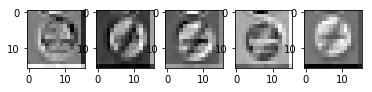

In [22]:
# testing one image

sess = tf.InteractiveSession()
#img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev = 0.01))
conv2d = tf.nn.conv2d(img_reshape,W1,strides = [1,2,2,1],padding = 'SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    # plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14),cmap ='gray')
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(16,16),cmap ='gray')

Tensor("MaxPool:0", shape=(1, 8, 8, 5), dtype=float32)


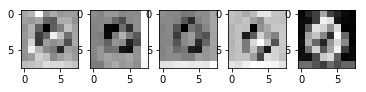

In [23]:
pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(8,8),cmap = 'gray')
    #plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(7,7),cmap = 'gray')

In [24]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

EPOCHS = training_epochs
BATCH_SIZE = batch_size

In [25]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [26]:
#keep_prob = tf.placeholder(tf.float32)

In [27]:
## new LeNet
from tensorflow.contrib.layers import flatten

def LeNet(x):    
   
    W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev = 0.01))
    L1 = tf.nn.conv2d(x,W1,strides = [1,1,1,1],padding = 'SAME')
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides = [1,2,2,1],padding = 'SAME')
    #L1 = tf.nn.dropout(L1,keep_prob = keep_prob)
    # L1 image size:( ?,32,32,1)
    # Conv: (?,32,32,32)
    # Pool: (?,16,16,32)


    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev = 0.01))
    L2 = tf.nn.conv2d(L1,W2,strides = [1,1,1,1],padding = 'SAME')
    L2 = tf.nn.max_pool(L2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME')
    L2 = tf.nn.relu(L2)
    #L2 = tf.nn.dropout(L2,keep_prob = keep_prob)
    # L2 image size:(?,14,14,32)
    # Conv: (?,16,16,64)
    # Pool: (?,8,8,64)
    
    
    W3 = tf.Variable(tf.random_normal([3,3,64,128],stddev = 0.01))
    L3 = tf.nn.conv2d(L2,W3,strides = [1,1,1,1],padding = 'SAME')
    L3 = tf.nn.relu(L3)
    L3 = tf.nn.max_pool(L3,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    L3 = tf.nn.relu(L3)
    #L3 = tf.nn.dropout(L3,keep_prob = keep_prob)
    L3 = tf.reshape(L3,[-1,128*4*4])
    # L3 image size (?,8,8,128)
    # relu (?,8,8,128)
    # maxpool (4,4,128)
    # dropout (?,4,4,128)
    # reshape (2048)
    
    W4 = tf.get_variable('W4',shape = [128*4*4,625],initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([625]))
    L4 = tf.nn.relu(tf.matmul(L3,W4)+b4)
    #L4 = tf.nn.dropout(L4,keep_prob=keep_prob)
    
    W5 = tf.get_variable('W5',shape = [625,n_classes],initializer = tf.contrib.layers.xavier_initializer())
    b = tf.Variable(tf.random_normal([n_classes]))
    logits = tf.matmul(L4,W5)+b

    
    
    return logits

In [28]:

#rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)


# model evaluation 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [29]:

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [30]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [31]:
## train the model 

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.232

EPOCH 2 ...
Validation Accuracy = 0.630

EPOCH 3 ...
Validation Accuracy = 0.698

EPOCH 4 ...
Validation Accuracy = 0.714

EPOCH 5 ...
Validation Accuracy = 0.740

EPOCH 6 ...
Validation Accuracy = 0.760

EPOCH 7 ...
Validation Accuracy = 0.753

EPOCH 8 ...
Validation Accuracy = 0.777

EPOCH 9 ...
Validation Accuracy = 0.776

EPOCH 10 ...
Validation Accuracy = 0.788

EPOCH 11 ...
Validation Accuracy = 0.791

EPOCH 12 ...
Validation Accuracy = 0.782

EPOCH 13 ...
Validation Accuracy = 0.782

EPOCH 14 ...
Validation Accuracy = 0.804

EPOCH 15 ...
Validation Accuracy = 0.791

Model saved


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Model Architecture

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [31]:
# number of example to test out:  5
num_examples = 5

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.020

EPOCH 2 ...
Validation Accuracy = 0.007

EPOCH 3 ...
Validation Accuracy = 0.007

EPOCH 4 ...
Validation Accuracy = 0.007

EPOCH 5 ...
Validation Accuracy = 0.007

EPOCH 6 ...
Validation Accuracy = 0.008

EPOCH 7 ...
Validation Accuracy = 0.020

EPOCH 8 ...
Validation Accuracy = 0.020

EPOCH 9 ...
Validation Accuracy = 0.020

EPOCH 10 ...
Validation Accuracy = 0.018



KeyboardInterrupt: 

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")